In [1]:
# collect data
import os
import numpy as np
import pandas as pd

root = "./Dog Collar IFT/"
folder = os.listdir(root)
datasets = {}
for fold in folder:
    name = fold
    subfolder = os.listdir(root + fold)
    for subfold in subfolder:
        if "Activity" in subfold:
            activity_data = pd.read_csv(root + fold + "/" + subfold)
            activity_data = pd.DataFrame(np.array(activity_data[['Packet Time', ' Activity']]))  
        elif "Light" in subfold:
            light_data = pd.read_csv(root + fold + "/" + subfold)
            light_data = pd.DataFrame(np.array(light_data[['Packet Time', ' Light']]))     
        elif "Audio" in subfold:
            audio_data = pd.read_csv(root + fold + "/" + subfold)
            audio_data = pd.DataFrame(np.array(audio_data[['Packet Time',' Audio']]))
        elif "IMU" in subfold:
            imu_data = pd.read_csv(root + fold + "/" + subfold)
            imu_data['action'] = imu_data[' X']**2 + imu_data[' Y']**2 + imu_data[' Z']**2
            imu_data = pd.DataFrame(np.array(imu_data[['Packet Time', ' X', ' Y', ' Z', 'action']]))
        elif "Pressure" in subfold:
            pressure_data = pd.read_csv(root + fold + "/" + subfold)
            pressure_data = pd.DataFrame(np.array(pressure_data[['Packet Time', ' Pressure']]))       
        elif "Temp_" in subfold:
            temp_data = pd.read_csv(root + fold + "/" + subfold)
            temp_data = pd.DataFrame(np.array(temp_data[['Packet Time', ' Temperature']]))
        elif "Humid" in subfold:
            humid_data = pd.read_csv(root + fold + "/" + subfold)
            humid_data = pd.DataFrame(np.array(humid_data[['Packet Time', ' Humidity']]))
    dataset = {'act':activity_data, 'light':light_data, 'audio':audio_data, 'imu':imu_data, 'press':pressure_data, 'temp':temp_data, 'humid':humid_data}
    datasets.update({name:dataset})
print(datasets.keys())

dict_keys(['2022-10-05-08_29_20'])


# Low-Level Fusion (Data Level)

In [2]:
import DFE_object

C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        39
         2.0       0.00      0.00      0.00        22
         3.0       0.00      0.00      0.00        41
         4.0       0.00      0.00      0.00        50
         5.0       0.67      0.07      0.12        59
         6.0       0.25      0.99      0.40       111
         7.0       1.00      1.00      1.00       482
         8.0       0.00      0.00      0.00        67
         9.0       0.00      0.00      0.00        94
        10.0       0.58      0.40      0.47        53
        11.0       0.96      0.77      0.85       149
        12.0       1.00      1.00      1.00       310
        13.0       0.00      0.00      0.00        73
        14.0       0.97      0.87      0.92        76
        15.0       0.00      0.00      0.00        50
        16.0       1.00      1.00      1.00       136
        17.0       0.78    

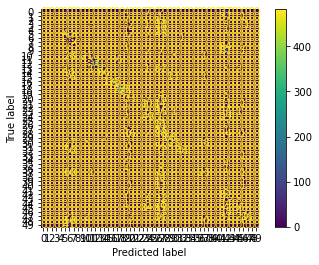

(array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 16,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2627e35cca0>)

In [3]:
# Create DFE object
dfeo = DFE_object.DFE_object() 

# Upload data
a_data = datasets['2022-10-05-08_29_20']
dfeo.import_from_pandas(a_data['light'], t = 0)
dfeo.import_from_pandas(a_data['audio'], t = 0)
dfeo.import_from_pandas(a_data['imu'],   t = 0)
dfeo.import_from_pandas(a_data['press'], t = 0)
dfeo.import_from_pandas(a_data['temp'] , t = 0)
dfeo.import_from_pandas(a_data['humid'], t = 0)
dfeo.import_from_pandas(a_data['act'],   t = 0, y = 1, categorical = 1)

# Temporal Alignment
u_time = pd.DataFrame(a_data['imu'][0]) # we chose to have imu time as the universal time
dfeo.temporal_alignment(u_time)

# Normalize (Z-score)
dfeo.normalize('Entry_0', ignore = [0]) # Z-score not the time column
dfeo.normalize('Entry_1', ignore = [0])
dfeo.normalize('Entry_2', ignore = [0])
dfeo.normalize('Entry_3', ignore = [0])
dfeo.normalize('Entry_4', ignore = [0])
dfeo.normalize('Entry_5', ignore = [0])

# Low-Level Data Fusion: Concatenation
dfeo.concatenate()

# Classification: Random Forest
dfeo.random_forest()
dfeo.classification_report()

# Mid-Level Fusion (Feature Level)

Calculated average on dataset Entry_0 at 2023-05-19 09:54:53.494914.
Calculated average on dataset Entry_1 at 2023-05-19 09:54:53.513347.
Calculated average on dataset Entry_2 at 2023-05-19 09:54:53.533341.
Calculated average on dataset Entry_3 at 2023-05-19 09:54:53.540405.
Calculated average on dataset Entry_4 at 2023-05-19 09:54:53.556066.
Calculated average on dataset Entry_5 at 2023-05-19 09:54:53.556066.
Calculated variance on dataset Entry_0 at 2023-05-19 09:54:53.571690.
Calculated variance on dataset Entry_1 at 2023-05-19 09:54:53.587283.
Calculated variance on dataset Entry_2 at 2023-05-19 09:54:53.618533.
Calculated variance on dataset Entry_3 at 2023-05-19 09:54:53.645025.
Calculated variance on dataset Entry_4 at 2023-05-19 09:54:53.656547.
Calculated variance on dataset Entry_5 at 2023-05-19 09:54:53.672173.
Calculated skewness on dataset Entry_0 at 2023-05-19 09:54:53.772856.
Calculated skewness on dataset Entry_1 at 2023-05-19 09:54:53.871834.
Calculated skewness on dat

C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\

              precision    recall  f1-score   support

         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
        12.0       0.50      0.67      0.57         3
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        16.0       1.00      0.50      0.67         2
        17.0       0.00      0.00      0.00         0
        18.0       0.40      1.00      0.57         2
        20.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         2
        27.0       0.00      0.00      0.00         2
        28.0       0.00      0.00      0.00         1
        31.0       0.00      0.00      0.00         2
        32.0       0.00      0.00      0.00         0
        37.0       0.33      1.00      0.50         1
        42.0       1.00      1.00      1.00         1
        45.0       0.00    

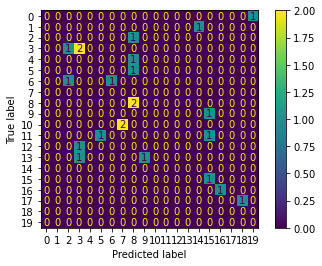

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0,

In [4]:
# Feature Extraction

dfeo.set_window_scheme(length = 30000, overlap = 5000) # set windowing scheme

dfeo.fe_average("Entry_0")
dfeo.fe_average("Entry_1")
dfeo.fe_average("Entry_2")
dfeo.fe_average("Entry_3")
dfeo.fe_average("Entry_4")
dfeo.fe_average("Entry_5")

dfeo.fe_variance("Entry_0")
dfeo.fe_variance("Entry_1")
dfeo.fe_variance("Entry_2")
dfeo.fe_variance("Entry_3")
dfeo.fe_variance("Entry_4")
dfeo.fe_variance("Entry_5")

dfeo.fe_skewness("Entry_0")
dfeo.fe_skewness("Entry_1")
dfeo.fe_skewness("Entry_2")
dfeo.fe_skewness("Entry_3")
dfeo.fe_skewness("Entry_4")
dfeo.fe_skewness("Entry_5")

dfeo.fe_kurtosis("Entry_0")
dfeo.fe_kurtosis("Entry_1")
dfeo.fe_kurtosis("Entry_2")
dfeo.fe_kurtosis("Entry_3")
dfeo.fe_kurtosis("Entry_4")
dfeo.fe_kurtosis("Entry_5")

dfeo.fe_peak_count("Entry_0")
dfeo.fe_peak_count("Entry_1")
dfeo.fe_peak_count("Entry_2")
dfeo.fe_peak_count("Entry_3")
dfeo.fe_peak_count("Entry_4")
dfeo.fe_peak_count("Entry_5")

dfeo.fe_RMS("Entry_0")
dfeo.fe_RMS("Entry_1")
dfeo.fe_RMS("Entry_2")
dfeo.fe_RMS("Entry_3")
dfeo.fe_RMS("Entry_4")
dfeo.fe_RMS("Entry_5")

dfeo.classification_windowing("Entry_6")

# Mid-Level Fusion: Concatenation
dfeo.concatenate() # should be able to specify that we're concatenating features for a given window_scheme, 
                   # defaults to current window scheme if unspecified

# Dimensional Reduction: PCA
dfeo.my_PCA("active")

# Classification: Random Forest
dfeo.random_forest() 
dfeo.classification_report()


# Mid-Level Fusion (LDA instead of PCA and Random Forest)

Calculated average on dataset Entry_0 at 2023-05-19 09:55:00.013356.
Calculated average on dataset Entry_1 at 2023-05-19 09:55:00.029919.
Calculated average on dataset Entry_2 at 2023-05-19 09:55:00.046860.
Calculated average on dataset Entry_3 at 2023-05-19 09:55:00.057857.
Calculated average on dataset Entry_4 at 2023-05-19 09:55:00.068856.
Calculated average on dataset Entry_5 at 2023-05-19 09:55:00.079950.
Calculated variance on dataset Entry_0 at 2023-05-19 09:55:00.079950.
Calculated variance on dataset Entry_1 at 2023-05-19 09:55:00.095575.
Calculated variance on dataset Entry_2 at 2023-05-19 09:55:00.126827.
Calculated variance on dataset Entry_3 at 2023-05-19 09:55:00.142486.
Calculated variance on dataset Entry_4 at 2023-05-19 09:55:00.158110.
Calculated variance on dataset Entry_5 at 2023-05-19 09:55:00.173735.
Calculated skewness on dataset Entry_0 at 2023-05-19 09:55:00.257658.
Calculated skewness on dataset Entry_1 at 2023-05-19 09:55:00.351410.
Calculated skewness on dat

C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\

              precision    recall  f1-score   support

         5.0       0.00      0.00      0.00         1
         6.0       0.50      1.00      0.67         1
         7.0       0.00      0.00      0.00         1
        11.0       1.00      1.00      1.00         1
        12.0       0.67      0.67      0.67         3
        13.0       1.00      1.00      1.00         1
        14.0       0.50      1.00      0.67         1
        16.0       1.00      1.00      1.00         1
        17.0       0.00      0.00      0.00         1
        18.0       1.00      0.67      0.80         3
        20.0       0.00      0.00      0.00         0
        24.0       0.50      1.00      0.67         1
        27.0       1.00      1.00      1.00         1
        28.0       0.00      0.00      0.00         1
        32.0       1.00      0.50      0.67         2
        42.0       0.50      1.00      0.67         1
        43.0       0.00      0.00      0.00         0
        44.0       0.00    

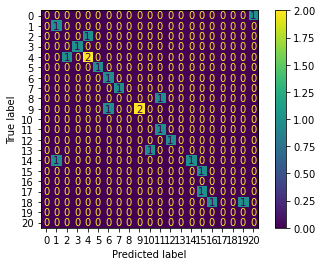

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [5]:
# Feature Extraction

dfeo.set_window_scheme(length = 30000, overlap = 5000) # set windowing scheme

dfeo.fe_average("Entry_0")
dfeo.fe_average("Entry_1")
dfeo.fe_average("Entry_2")
dfeo.fe_average("Entry_3")
dfeo.fe_average("Entry_4")
dfeo.fe_average("Entry_5")

dfeo.fe_variance("Entry_0")
dfeo.fe_variance("Entry_1")
dfeo.fe_variance("Entry_2")
dfeo.fe_variance("Entry_3")
dfeo.fe_variance("Entry_4")
dfeo.fe_variance("Entry_5")

dfeo.fe_skewness("Entry_0")
dfeo.fe_skewness("Entry_1")
dfeo.fe_skewness("Entry_2")
dfeo.fe_skewness("Entry_3")
dfeo.fe_skewness("Entry_4")
dfeo.fe_skewness("Entry_5")

dfeo.fe_kurtosis("Entry_0")
dfeo.fe_kurtosis("Entry_1")
dfeo.fe_kurtosis("Entry_2")
dfeo.fe_kurtosis("Entry_3")
dfeo.fe_kurtosis("Entry_4")
dfeo.fe_kurtosis("Entry_5")

dfeo.fe_peak_count("Entry_0")
dfeo.fe_peak_count("Entry_1")
dfeo.fe_peak_count("Entry_2")
dfeo.fe_peak_count("Entry_3")
dfeo.fe_peak_count("Entry_4")
dfeo.fe_peak_count("Entry_5")

dfeo.fe_RMS("Entry_0")
dfeo.fe_RMS("Entry_1")
dfeo.fe_RMS("Entry_2")
dfeo.fe_RMS("Entry_3")
dfeo.fe_RMS("Entry_4")
dfeo.fe_RMS("Entry_5")

dfeo.classification_windowing("Entry_6")

# Mid-Level Fusion: Concatenation
dfeo.concatenate() # should be able to specify that we're concatenating features for a given window_scheme, 
                   # defaults to current window scheme if unspecified

# Dimensional Reduction and Classification: LDA
dfeo.my_LDA(5)
dfeo.classification_report()
